# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))



3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


1. Pierwiastki wielomianu x^2 + 3x + 2:
Pierwiastki: [-2. -1.]

3. Porównanie pierwiastków oryginalnych z oczekiwanymi (1..15):
x 1: 1.00000000  błąd: 3.23e-14
x 2: 2.00000000  błąd: 4.52e-13
x 3: 3.00000000  błąd: 3.20e-12
x 4: 4.00000000  błąd: 6.33e-10
x 5: 4.99999999  błąd: 1.04e-08
x 6: 6.00000007  błąd: 6.79e-08
x 7: 6.99999978  błąd: 2.21e-07
x 8: 8.00000032  błąd: 3.24e-07
x 9: 9.00000013  błąd: 1.34e-07
x10: 9.99999855  błąd: 1.45e-06
x11: 11.00000283  błąd: 2.83e-06
x12: 11.99999705  błąd: 2.95e-06
x13: 13.00000182  błąd: 1.82e-06
x14: 13.99999938  błąd: 6.24e-07
x15: 15.00000009  błąd: 9.24e-08


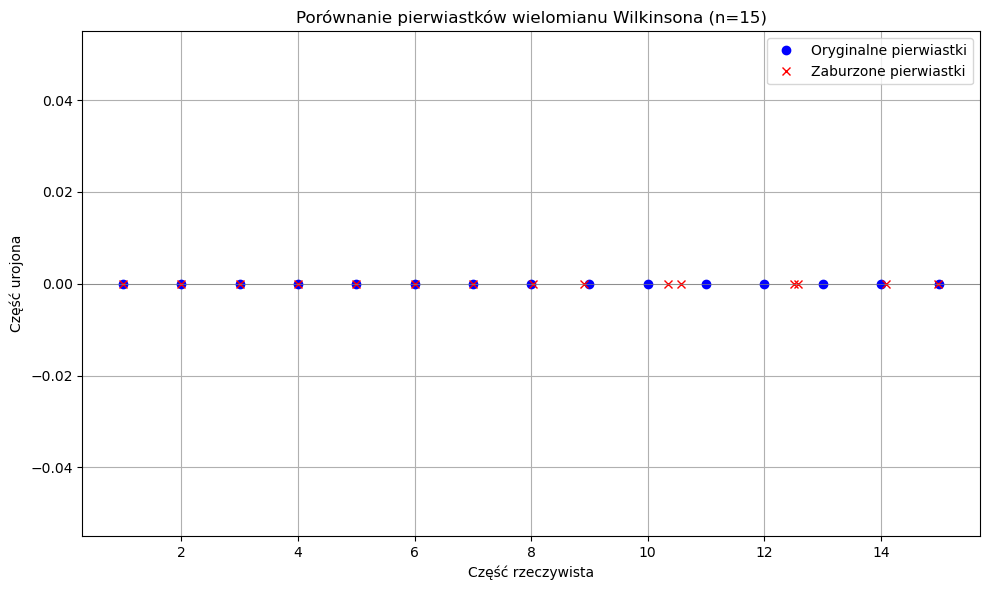


Wniosek:
Zadanie wyznaczania pierwiastków wielomianu Wilkinsona jest źle uwarunkowane.
Niewielka zmiana współczynnika powoduje znaczne przesunięcia pierwiastków,
a część z nich staje się zespolona.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Pierwiastki wielomianu x^2 + 3x + 2 
print("1. Pierwiastki wielomianu x^2 + 3x + 2:")
simple_poly = Polynomial([2, 3, 1])  # W(x) = x^2 + 3x + 2
simple_roots = simple_poly.roots()
print("Pierwiastki:", simple_roots)

# Wielomian Wilkinsona dla n = 15
x_n = np.arange(1, 16)
wilkinson15_poly = Polynomial.fromroots(x_n)

# Pierwiastki wielomianu i ocena dokładności
wilkinson15_roots = wilkinson15_poly.roots()
print("\n3. Porównanie pierwiastków oryginalnych z oczekiwanymi (1..15):")
errors = np.abs(np.sort(wilkinson15_roots) - x_n)
for i, (r, e) in enumerate(zip(np.sort(wilkinson15_roots), errors), start=1):
    print(f"x{i:2d}: {r:.8f}  błąd: {e:.2e}")


# Zaburzenia współczynnika
coeffs_perturbed = wilkinson15_poly.coef.copy()
if len(coeffs_perturbed) > 12:
    coeffs_perturbed[12] += 1e-5  # zaburzenie 13. współczynnika (indeks 12)
perturbed_poly = Polynomial(coeffs_perturbed)
perturbed_roots = perturbed_poly.roots()

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(wilkinson15_roots.real, wilkinson15_roots.imag, 'bo', label='Oryginalne pierwiastki')
plt.plot(perturbed_roots.real, perturbed_roots.imag, 'rx', label='Zaburzone pierwiastki')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Porównanie pierwiastków wielomianu Wilkinsona (n=15)")
plt.xlabel("Część rzeczywista")
plt.ylabel("Część urojona")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Wniosek
print("\nWniosek:")
print("Zadanie wyznaczania pierwiastków wielomianu Wilkinsona jest źle uwarunkowane.")
print("Niewielka zmiana współczynnika powoduje znaczne przesunięcia pierwiastków,")
print("a część z nich staje się zespolona.")


***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

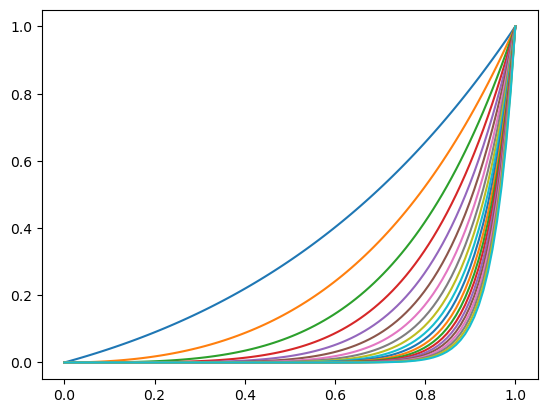

0.26424111765711533
0.207276647028654
0.17089341188538398
0.14553294057308008
0.1268023565615195
0.11238350406936348
0.10093196744509214
0.09161229299417073
0.0838770700582927
0.07735222935878028
0.07177324769463667
0.06694777996972334
0.06273108042387321
0.059033793641901866
0.05545930172957014
0.05719187059730757
-0.029453670751536265
1.559619744279189
-30.19239488558378
635.0402925972594
-13969.886437139707
321308.38805421325
-7711400.313301118
192785008.83252797
-5012410228.645727
135335076174.43463
-3789382132883.17
109892081853612.92


In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
X=np.linspace(0,1,100)
def f(x,n):
    return x**n*np.exp(x-1)
for i in range(1,21):
    plt.plot(X,f(X,i))
plt.show()
I = 1/np.e
for i in range(2,30):
    nextVal = 1-i*I
    print(nextVal)
    I = nextVal

In [50]:
#Obliczanie całki numeryczne:
import numpy as np
from scipy.integrate import quad

def numerical_integrals(n_max):
    def integrand(x, n):
        return x**n * np.exp(x-1)
        return [quad(integrand, 0, 1, args=(n))[0] for n in range(1, n_max +1)]

# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

2*x - 2*exp(-2*x)
2 + 4*exp(-2*x)


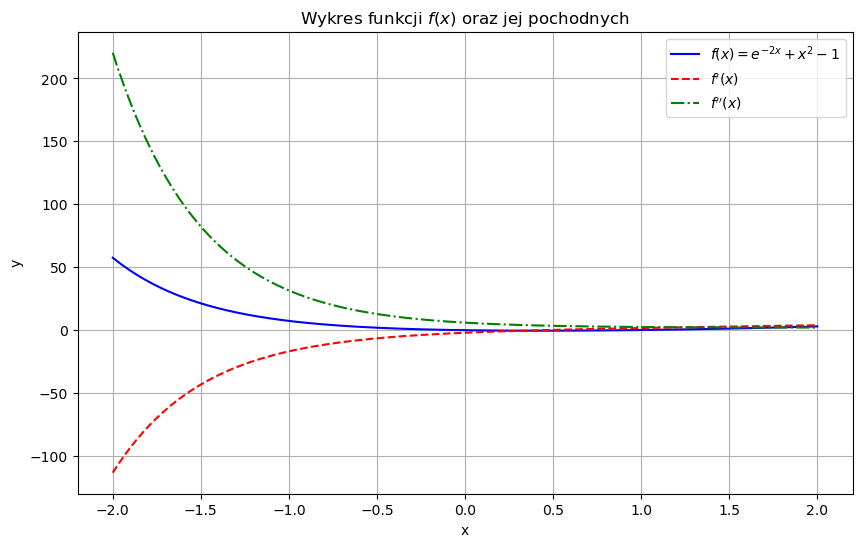

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definicja symboli i funkcji
x = sp.symbols('x')
f = sp.exp(-2*x) + x**2 - 1

# Obliczenie pierwszej i drugiej pochodnej
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
print(f_prime)
print(f_double_prime)

# Konwersja funkcji do postaci, którą można obliczyć dla konkretnych wartości x
f_lambda = sp.lambdify(x, f, 'numpy')
f_prime_lambda = sp.lambdify(x, f_prime, 'numpy')
f_double_prime_lambda = sp.lambdify(x, f_double_prime, 'numpy')

# Przygotowanie danych do wykresu
x_values = np.linspace(-2, 2, 400)
f_values = f_lambda(x_values)
f_prime_values = f_prime_lambda(x_values)
f_double_prime_values = f_double_prime_lambda(x_values)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

plt.plot(x_values, f_values, label='$f(x) = e^{-2x} + x^2 - 1$', color='blue')
plt.plot(x_values, f_prime_values, label="$f'(x)$", linestyle='--', color='red')
plt.plot(x_values, f_double_prime_values, label="$f''(x)$", linestyle='-.', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji $f(x)$ oraz jej pochodnych')
plt.legend()
plt.grid(True)
plt.show()

***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [27]:
import numpy as np
import sympy as sp

def metoda_siecznych(f, x0, x1, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if not x2.is_real or abs(x2 - x1) < tol or abs(f(x2)) < tol:
            return x2, iterations
        x0 = x1
        x1 = x2
        iterations += 1
    
    return None, iterations


def metoda_newtona_raphsona(f, df, x0, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < tol or abs(f(x1)) < tol:
            return x1, iterations
        x0 = x1
        iterations += 1
    
    return None, iterations

def metoda_bisekcji(f, a, b, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, iterations
        iterations += 1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return None, iterations

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [35]:
 # Definicja funkcji f(x)
x = sp.Symbol('x')
f = x**3 - 6*x**2 + 11*x - 6

# Obliczanie pochodnej funkcji f(x)
df = sp.diff(f, x)

# Definicja przedziałów startowych
intervals = [(0, 1), (2, 3), (4, 5)]

# Dokładność
epsilon = 1e-6

# Maksymalna liczba iteracji
max_iter = 1000

# Wyniki dla każdej metody
results = {'bisekcji': [], 'newtona_raphsona': [], 'siecznych': []}

# Funkcje pomocnicze dla każdej metody
def f_func(x_val):
    return f.subs(x, x_val)

def df_func(x_val):
    return df.subs(x, x_val)

# Porównanie dla każdego przedziału startowego
for interval in intervals:
    a, b = interval
    
    # Metoda bisekcji
    root, iterations = bisection_method(f_func, a, b, epsilon, max_iter)
    results['bisekcji'].append(iterations)
    
    # Metoda Newtona-Raphsona
    root, iterations = newton_raphson_method(f_func, df_func, (a + b) / 2, epsilon, max_iter)
    results['newtona_raphsona'].append(iterations)
    
    # Metoda siecznych
    root, iterations = secant_method(f_func, a, b, epsilon, max_iter)
    results['siecznych'].append(iterations)

# Wyświetlanie wyników
for method, iterations in results.items():
    print(f"Metoda {method}: {iterations}") 

Metoda bisekcji: [19, 19, 19]
Metoda newtona_raphsona: [4, 0, 5]
Metoda siecznych: [0, 0, 7]


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

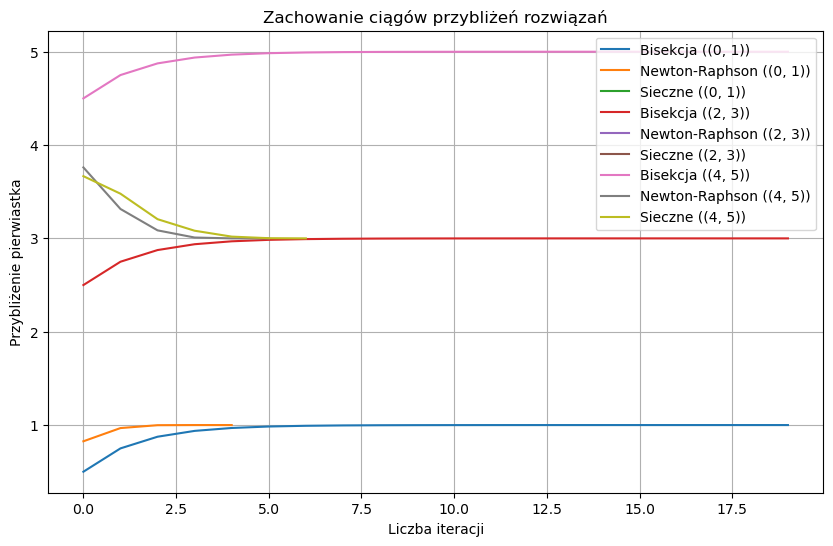

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def secant_method(f, x0, x1, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        fx1 = f(x1)
        fx0 = f(x0)
        if abs(fx1 - fx0) < tol:
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if x2 is None or abs(x2 - x1) < tol or abs(f(x2)) < tol:
            break
        x0 = x1
        x1 = x2
        iterations += 1
        approximations.append(x2)
    
    return approximations

def newton_raphson_method(f, df, x0, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        x1 = x0 - f(x0) / df(x0)
        approximations.append(x1)
        if abs(x1 - x0) < tol or abs(f(x1)) < tol:
            break
        x0 = x1
        iterations += 1
    
    return approximations

def bisection_method(f, a, b, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        c = (a + b) / 2
        approximations.append(c)
        if f(c) == 0 or (b - a) / 2 < tol:
            break
        iterations += 1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return approximations

# Definicja funkcji f(x)
x = sp.Symbol('x')
f_expr = x**3 - 6*x**2 + 11*x - 6
f_func = sp.lambdify(x, f_expr)

# Obliczanie pochodnej funkcji f(x)
df_expr = sp.diff(f_expr, x)
df_func = sp.lambdify(x, df_expr)

# Definicja przedziałów startowych
intervals = [(0, 1), (2, 3), (4, 5)]

# Dokładność
epsilon = 1e-6

# Maksymalna liczba iteracji
max_iter = 100

# Generowanie wykresów dla każdej metody
plt.figure(figsize=(10, 6))

for interval in intervals:
    a, b = interval
    
    bisection_approximations = bisection_method(f_func, a, b, epsilon, max_iter)
    plt.plot(range(len(bisection_approximations)), bisection_approximations, label=f'Bisekcja ({interval})')

    newton_raphson_approximations = newton_raphson_method(f_func, df_func, (a + b) / 2, epsilon, max_iter)
    plt.plot(range(len(newton_raphson_approximations)), newton_raphson_approximations, label=f'Newton-Raphson ({interval})')

    secant_approximations = secant_method(f_func, a, b, epsilon, max_iter)
    plt.plot(range(len(secant_approximations)), secant_approximations, label=f'Sieczne ({interval})')

plt.xlabel('Liczba iteracji')
plt.ylabel('Przybliżenie pierwiastka')
plt.title('Zachowanie ciągów przybliżeń rozwiązań')
plt.legend()
plt.grid(True)
plt.show()